![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)
This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from interpolation import chebyshev_nodes

# Erros numéricos

Enfim, um outro problema que podemos ter que enfrentar é a perda de precisão numérica,
seja ao resolver um sistema linear,
seja ao calcular a função polinomial resultante.
Vejamos uma nova expressão para o polinômio interpolador de Lagrange,
que será menos sensível a este tipo de erros: a fórmula baricêntrica.

Já notamos que o polinômio interpolador $P$ é dado de forma explícita por
$$ P(x) = \sum_{i=0}^n f(x_i) \phi_i(x) $$
onde os $\phi_i(x)$ são os polinômios especiais de interpolação.
Vamos expandir:
$$\begin{align*}
P(x) & = \sum_{i=0}^n f(x_i) \phi_i(x) = \sum_{i=0}^n f(x_i) \prod_{j \neq i} \frac{x - x_j}{x_i - x_j} \\
     & = \sum_{i=0}^n f(x_i) \prod_{j \neq i} (x - x_j) \prod_{j \neq i} \frac{1}{x_i - x_j} \\
     & \text{como o último fator não depende de $x$, vamos denotá-lo por $w_i$:} \\
     & = \sum_{i=0}^n f(x_i) w_i \prod_{j \neq i} (x - x_j) \\
     & \text{suponhamos que não vamos querer calcular em $x_i$ - já que sabemos que deve dar $f(x_i)$ de antemão!} \\
     & = \sum_{i=0}^n \frac{f(x_i) w_i}{x - x_i} \prod_{j} (x - x_j) = \sum_{i=0}^n \frac{f(x_i) w_i}{x - x_i} \omega(x)\\
     & \text{e agora o último fator não depende de $i$, podemos fatorá-lo:} \\
     & = \omega(x) \sum_{i=0}^n \frac{f(x_i) w_i}{x - x_i} \\
\end{align*}$$

Agora, um truque: o que acontece se estivéssemos tentando interpolar a função $f(x) = 1$?
Neste caso, teríamos que o polinômio interpolador seria também a função constante igual a um,
e assim:
$$ 1 = \omega(x) \sum_{i = 0}^n \frac{w_i}{x - x_i}. $$

Com isso, podemos eliminar o $\omega(x)$ da fórmula acima, e ficamos com
$$ P(x) = \frac{\displaystyle \sum_{i=0}^n \frac{f(x_i) w_i}{x - x_i} }{ \displaystyle \sum_{i=0}^n \frac{w_i}{x - x_i} }. $$
Esta fórmula é conhecida como **forma baricêntrica**,
porque os $w_i$ funcionam como "pesos" para os termos $\frac{1}{x - x_i}$,
e para interpolar $f$, vamos "corrigir" os pesos da função constante para usar os que são dados pela $f$.

In [3]:
def baricentrica(x,y):
    ### Resposta aqui


In [4]:
def f(x): return 1/(1+x**2)

In [5]:
x = chebyshev_nodes(-1,1,10)

In [6]:
y = f(x)
P = baricentrica(x,y)

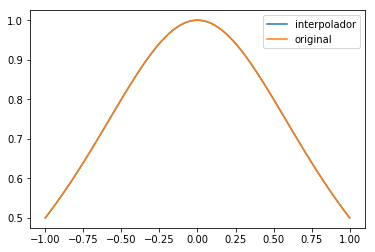

In [7]:
ts = np.linspace(-1,1,100)
plt.plot(ts,P(ts), label='interpolador')
plt.plot(ts,f(ts), label='original')
plt.legend(loc=0)
plt.show()

### Exercício

Enfim, use os pontos de Chebyshev e a fórmula baricêntrica para interpolar $f$.
Agora, tente usar **muitos** pontos de interpolação, e veja como o erro evolui.

In [8]:
def varios_chebyshev_bar(f,a,b,ns):
    ### Resposta aqui


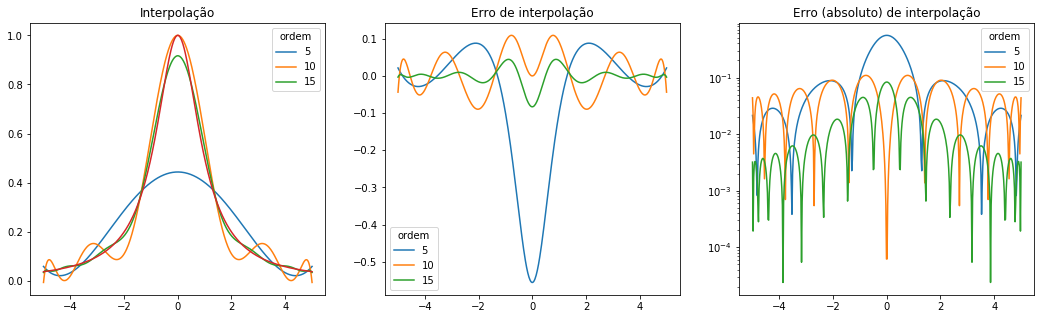

In [9]:
varios_chebyshev_bar(f,-5,5,[5,10,15])
plt.show()

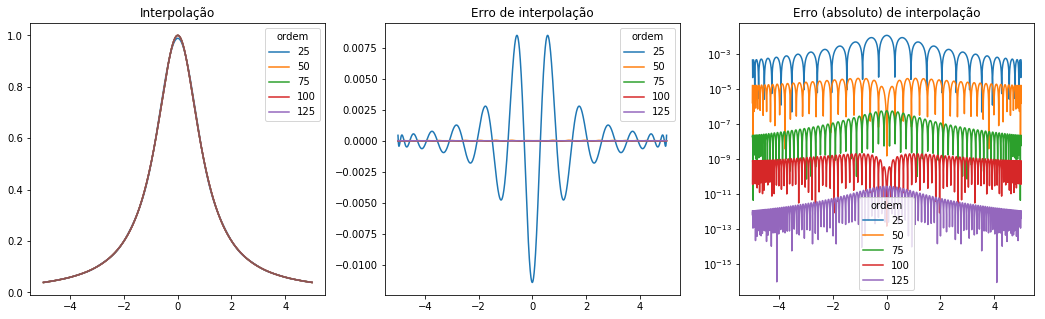

In [10]:
varios_chebyshev_bar(f,-5,5,[25,50,75,100,125])
plt.show()